<a href="https://colab.research.google.com/github/UzmaHasan/HTE-estimation-using-Causal-Trees/blob/main/Causal_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install the Causal Tree library**

In [1]:
!pip install causal_tree_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... error
     |████████████████████████████████| 124 kB 40.9 MB/s 
  Created wheel for causal-tree-learn: filename=causal_tree_learn-2.42-cp38-cp38-linux_x86_64.whl size=447517 sha256=3217e32feffe7fa996658bc5060d8d3f9286259bf2f97e7b97282b0d34bbe24f
  Stored in directory: /root/.cache/pip/wheels/37/6f/53/2bdcd40eeadd9a5386c492193d145a87c8df2ca4c2ca9cfa2e
Successfully built causal-tree-learn


# **Load other necessary libraries**

In [2]:
import pandas as pd
import numpy as np
from CTL.causal_tree_learn import CausalTree
from sklearn.model_selection import train_test_split
from IPython.display import Image

In [3]:
from google.colab import files
uploaded = files.upload()

Saving OT_survival.csv to OT_survival.csv


# **Load and View dataset**

In [4]:
df = pd.read_csv("OT_survival.csv")
df.head()

age  gender    bmi  surgery  trauma  medical  apsiii  sofa  smoker  copd  \
0   62       0  26.45        0       0        0      39     5       0     0   
1   52       0  36.86        0       0        0      77     9       0     0   
2   56       1  30.75        0       0        0      75     9       0     0   
3   51       1   0.00        0       0        0      44     4       1     0   
4   60       1  23.74        0       0        0      32     4       0     1   

   ...       sao2        pao2      paco2        ph  lactate  hemoglobin  \
0  ...  91.200000   84.259259   0.000000  7.337170    0.740    8.271429   
1  ...  94.000000   82.500000   0.000000  7.414286    1.725    7.400000   
2  ...  91.200000   89.263158  36.631579  7.433500    0.000    9.975000   
3  ...  98.000000  122.083333  56.727273  7.188333    1.400   10.200000   
4  ...  93.333333   67.250000  69.090909  7.335417    0.000   11.266666   

        peep          vt  peakAirPressure  minVentVol  
0   9.894737  318.785714        35.352941   10.852000  
1   8.571429  460.153846        20.692308   11.484211  
2  10.785714  680.142857        25.500000   16.390000  
3   8.200000  585.514286        29.724138   18.450000  
4   6.250000  680.833333        29.281818   13.141667  

[5 rows x 26 columns]

In [5]:
#define columns
df.columns = ['age', 'gender', 'bmi', 'surgery', 'trauma', 'medical', 'apsiii', 'sofa', 'smoker', 'copd', 
              'ischemicHd', 'ards', 'survival', 'oxygenation', 'spo2', 'fio2', 'sao2', 'pao2', 'paco2', 'ph',
              'lactate', 'hemoglobin', 'peep', 'vt', 'peakAirPressure', 'minVentVol']

In [6]:
#define outcome variable
y = df['survival'].values

In [7]:
#define treatment variable
treatment = df['oxygenation'].values

In [8]:
#define covariates
x = df.drop(['survival', 'oxygenation'], axis=1).values

In [9]:
columns = df.drop(['survival', 'oxygenation'], axis=1).columns

y[y == 0] = -1

# **Test Size = 10%**

In [10]:
np.random.seed(0)

#train-test split
x_train, x_test, y_train, y_test, treat_train, treat_test = train_test_split(x, y, treatment, test_size=0.1, random_state=42)

**Causal Trees - Adaptive (CT-A)**

In [11]:
# adaptive CT
ct_adaptive = CausalTree(weight=0.0, split_size=0.0)
ct_adaptive.fit(x_train, y_train, treat_train)
ct_adaptive.prune()
ct_adaptive_predict = ct_adaptive.predict(x_test)

In [12]:
#Plotting the fitted tree
ct_adaptive.plot_tree(features=columns, filename="content/CT-A_10%", show_effect=True)

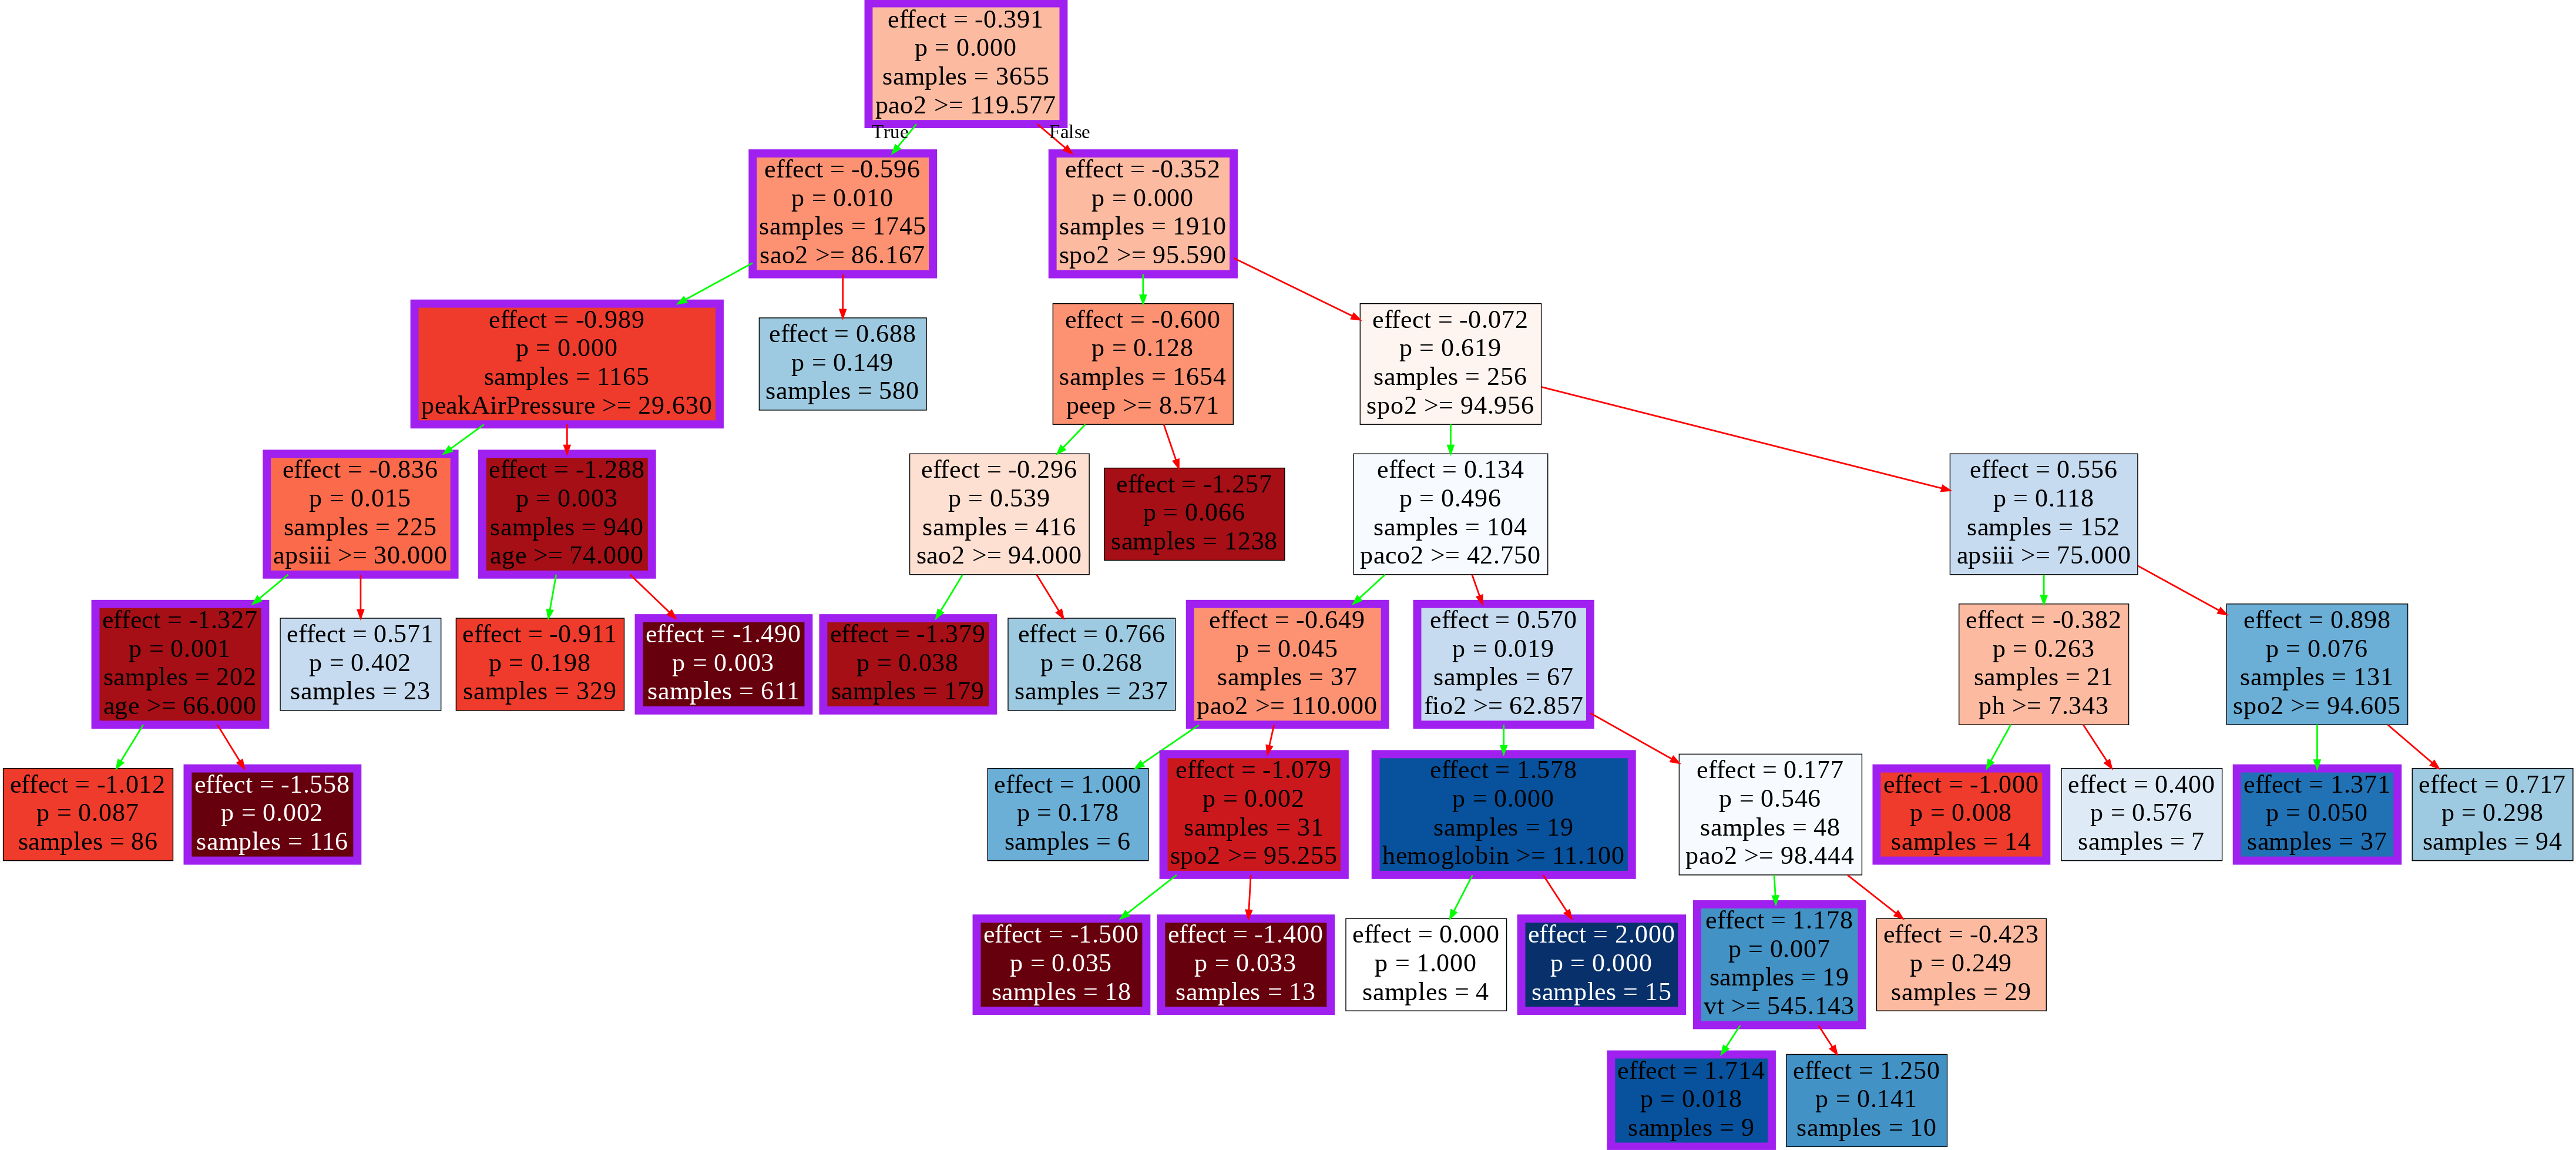

In [13]:
#Display the fitted tree
Image('/content/content/CT-A_10%.png')

**Causal Trees - Honest (CT-H)**

In [14]:
# honest CT 
ct_honest = CausalTree(honest=True, weight=0.0, split_size=0.0)
ct_honest.fit(x_train, y_train, treat_train)
ct_honest.prune()
ct_honest_predict = ct_honest.predict(x_test)

In [15]:
#Plotting the fitted tree
ct_honest.plot_tree(features=columns, filename="content/CT-H_10%", show_effect=True)

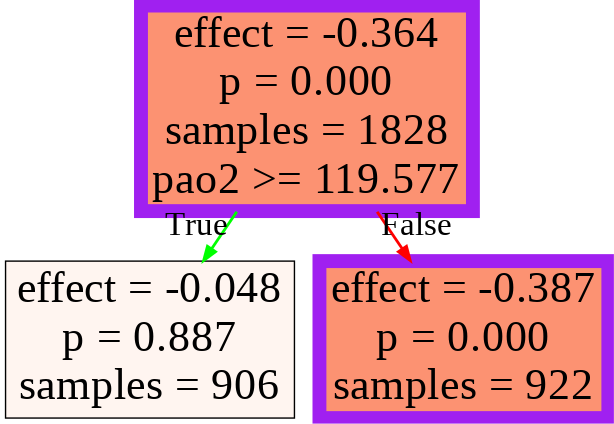

In [16]:
#Display the fitted tree
Image('/content/content/CT-H_10%.png')

**Causal Trees - Learn (CT-L)**

In [17]:
# regular CTL
ctl = CausalTree(magnitude=False)
ctl.fit(x_train, y_train, treat_train)
ctl.prune()
ctl_predict = ctl.predict(x_test)

In [18]:
#Plotting the fitted trees
ctl.plot_tree(features=columns, filename="content/CT-L_10%", show_effect=True)

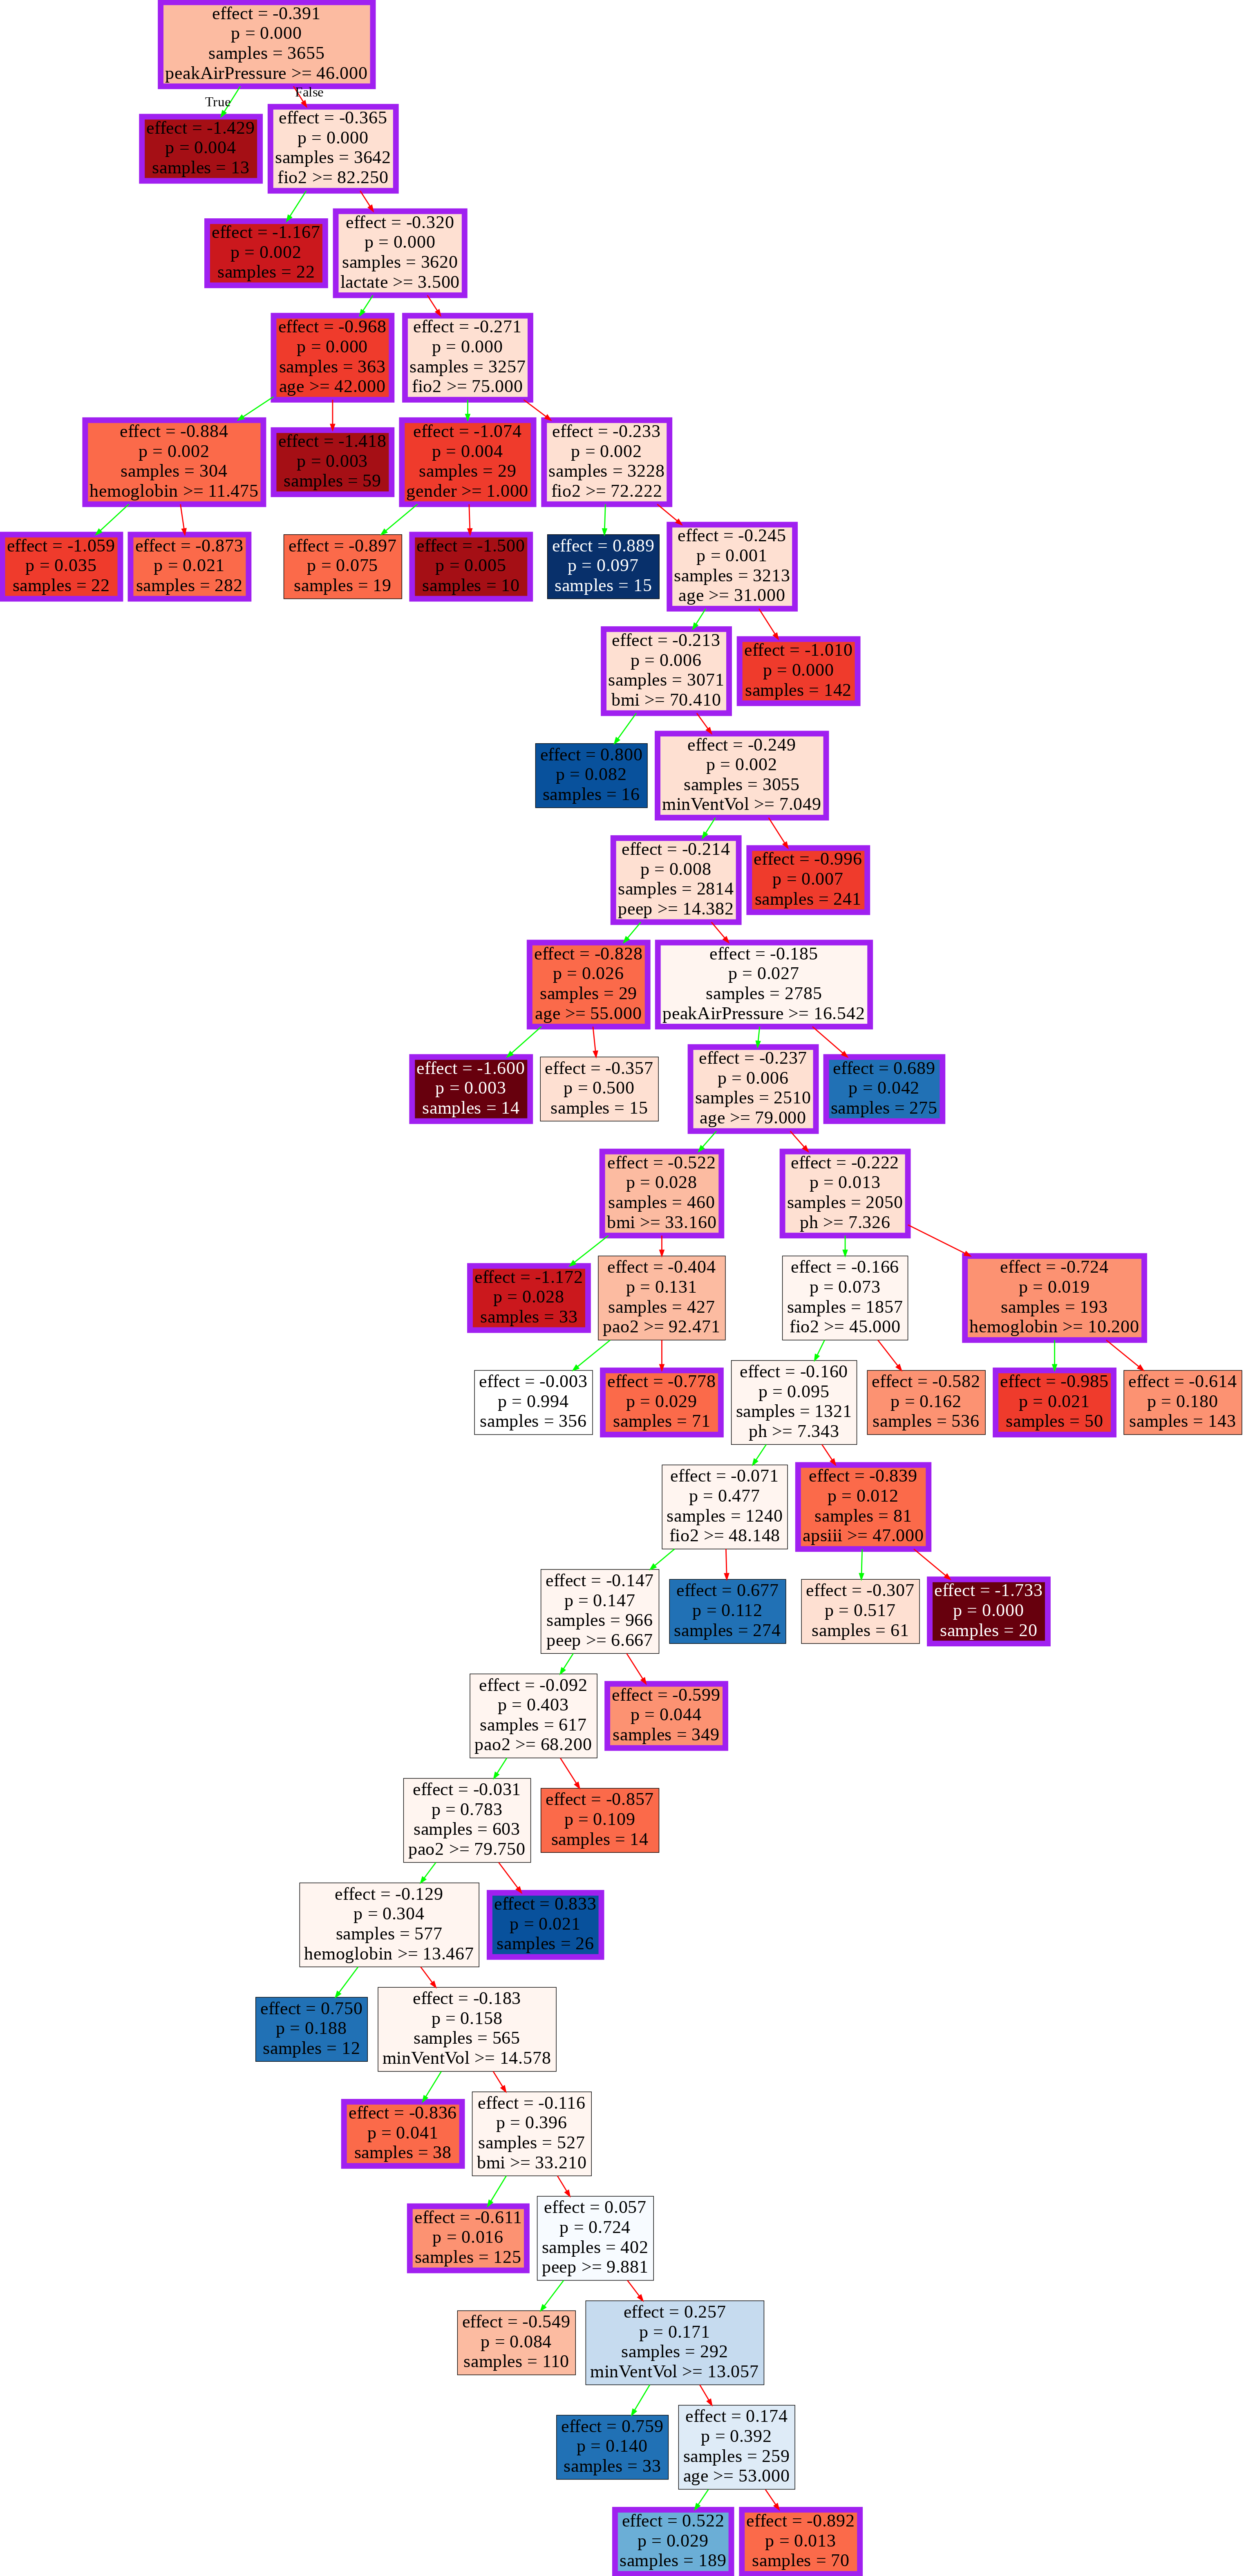

In [19]:
#Display the fitted trees
Image('/content/content/CT-L_10%.png')

**Causal Trees - Honest Learn (CT-HL)**

In [20]:
# honest CTL (CT-HL)
cthl = CausalTree(honest=True)
cthl.fit(x_train, y_train, treat_train)
cthl.prune()
cthl_predict = cthl.predict(x_test)

In [21]:
#Plotting the fitted trees
cthl.plot_tree(features=columns, filename="content/CT-HL_10%", show_effect=True)

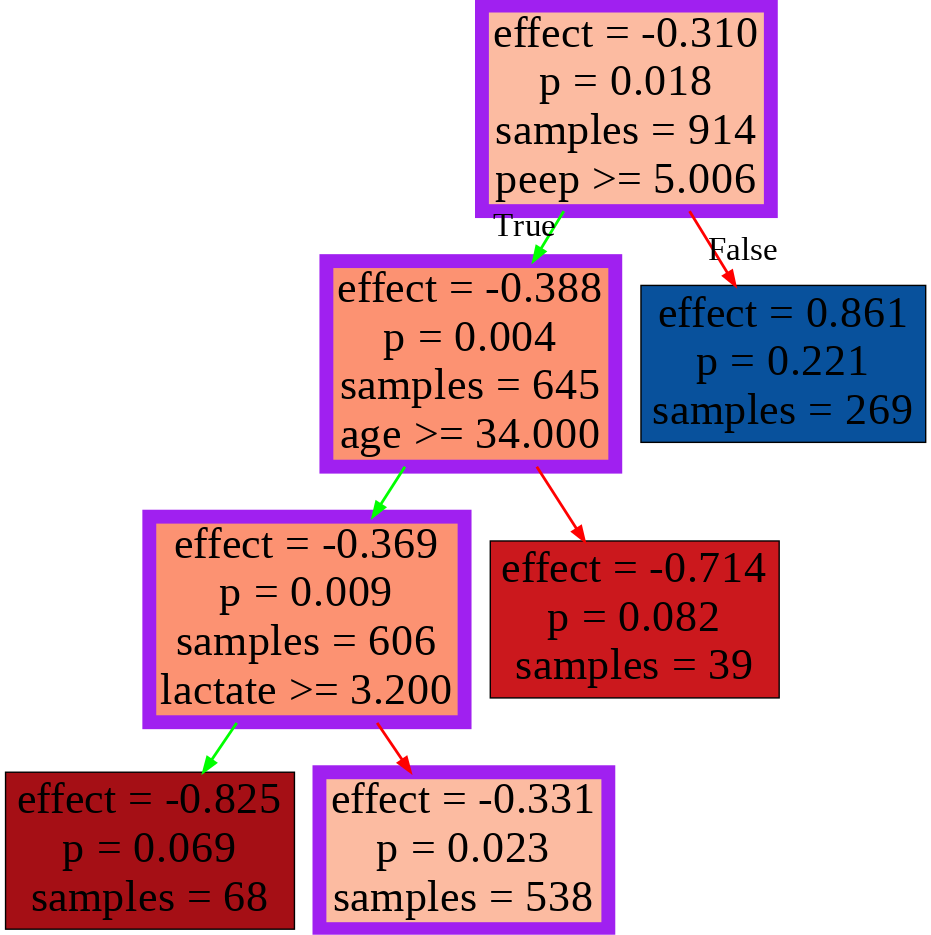

In [22]:
#Display the fitted trees
Image('/content/content/CT-HL_10%.png')

**Causal Trees - Honest Validation (CT-HV)**

In [23]:
# val honest CTL (CT-HV)
cthv = CausalTree(val_honest=True)
cthv.fit(x_train, y_train, treat_train)
cthv.prune()
cthv_predict = cthv.predict(x_test)

In [24]:
#Plotting the fitted trees
cthv.plot_tree(features=columns, filename="content/CT-HV_10%", show_effect=True)

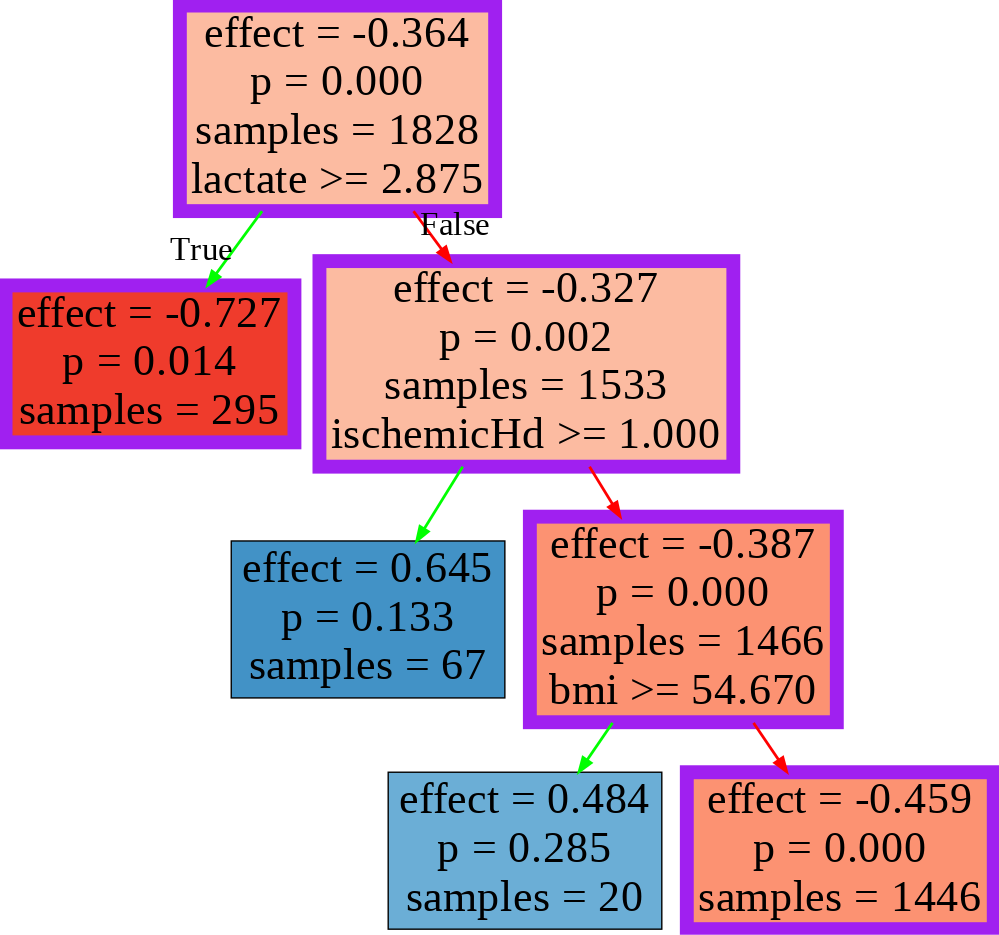

In [25]:
#Display the fitted trees
Image('/content/content/CT-HV_10%.png')

# **Test Size = 20%**

In [26]:
np.random.seed(0)

#train-test split
x_train, x_test, y_train, y_test, treat_train, treat_test = train_test_split(x, y, treatment, test_size=0.2, random_state=42)

In [27]:
# adaptive CT
ct_adaptive = CausalTree(weight=0.0, split_size=0.0)
ct_adaptive.fit(x_train, y_train, treat_train)
ct_adaptive.prune()
ct_adaptive_predict = ct_adaptive.predict(x_test)

In [28]:
#Plotting the fitted tree
ct_adaptive.plot_tree(features=columns, filename="content/CT-A_20%", show_effect=True)

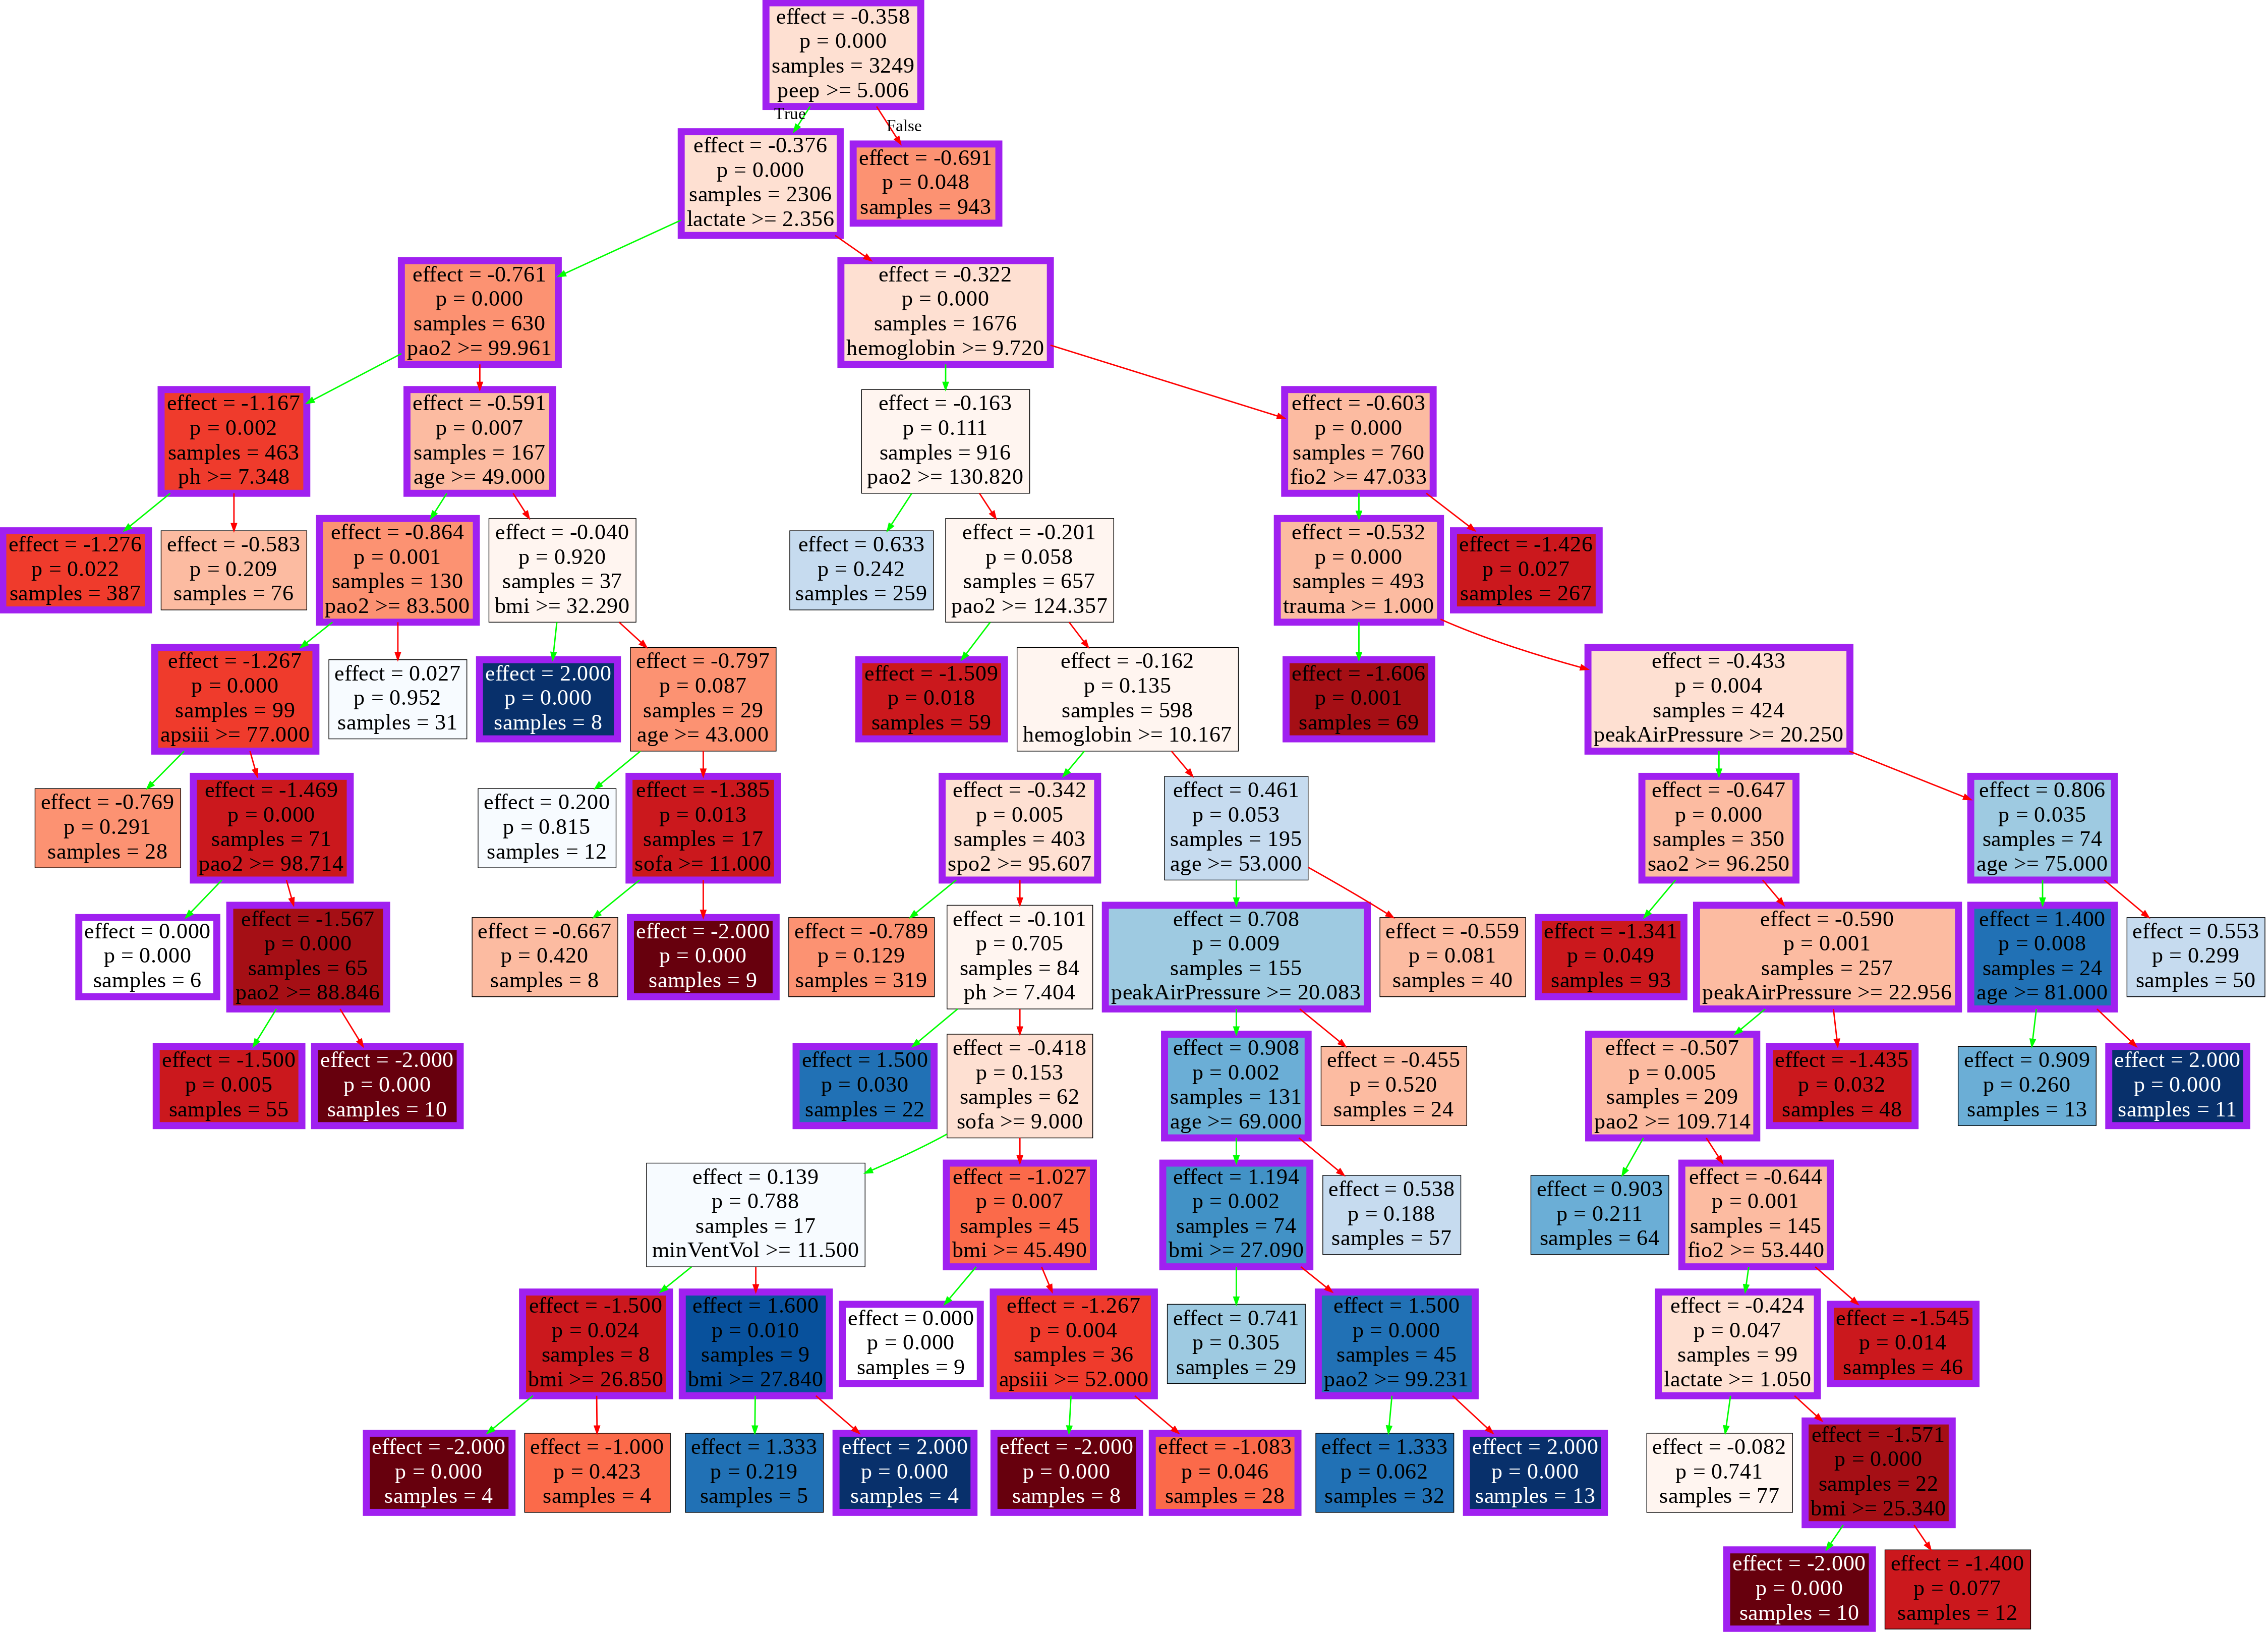

In [29]:
#Display the fitted tree
Image('/content/content/CT-A_20%.png')

In [30]:
# honest CT 
ct_honest = CausalTree(honest=True, weight=0.0, split_size=0.0)
ct_honest.fit(x_train, y_train, treat_train)
ct_honest.prune()
ct_honest_predict = ct_honest.predict(x_test)

In [31]:
#Plotting the fitted tree
ct_honest.plot_tree(features=columns, filename="content/CT-H_20%", show_effect=True)

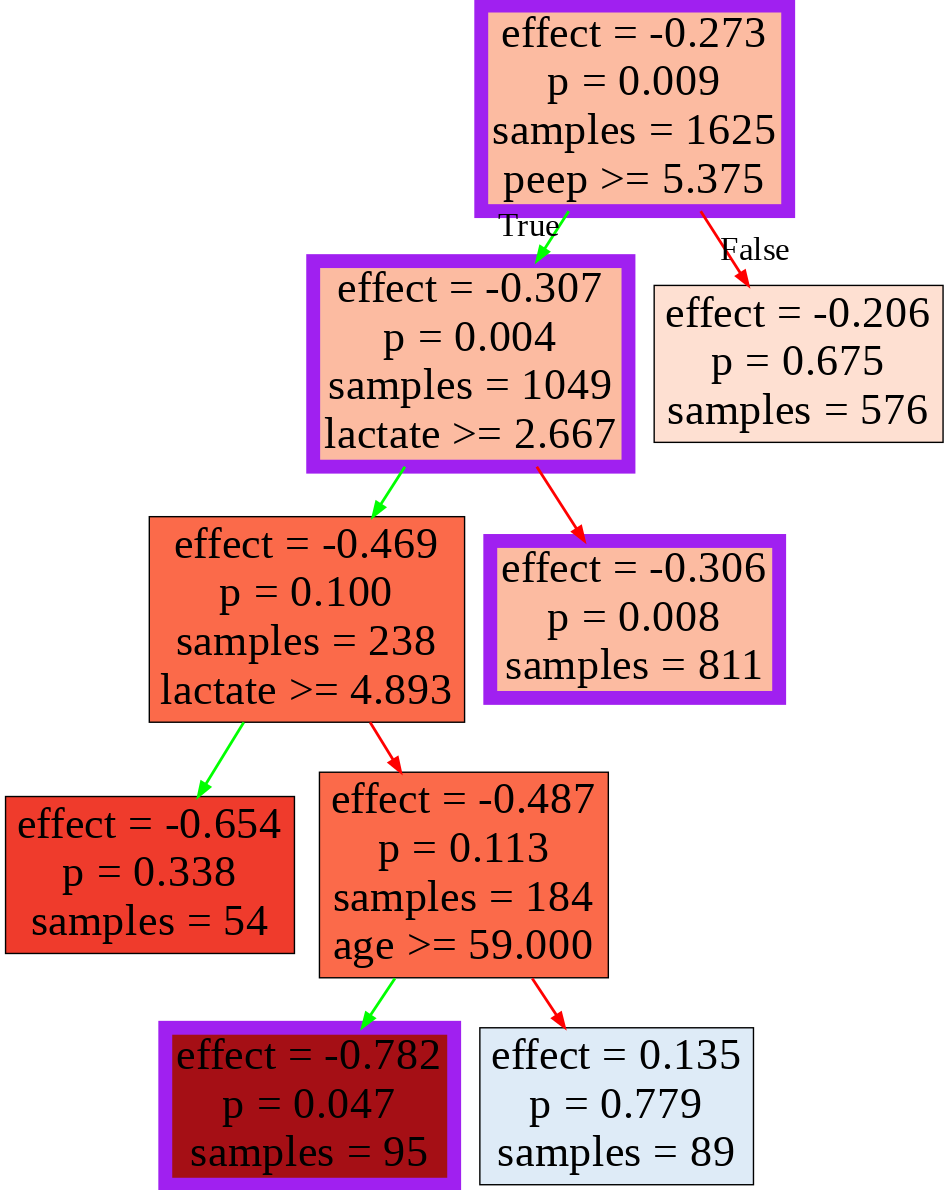

In [32]:
#Display the fitted tree
Image('/content/content/CT-H_20%.png')

In [33]:
# regular CTL
ctl = CausalTree(magnitude=False)
ctl.fit(x_train, y_train, treat_train)
ctl.prune()
ctl_predict = ctl.predict(x_test)

In [34]:
#Plotting the fitted tree
ctl.plot_tree(features=columns, filename="content/CT-L_20%", show_effect=True)

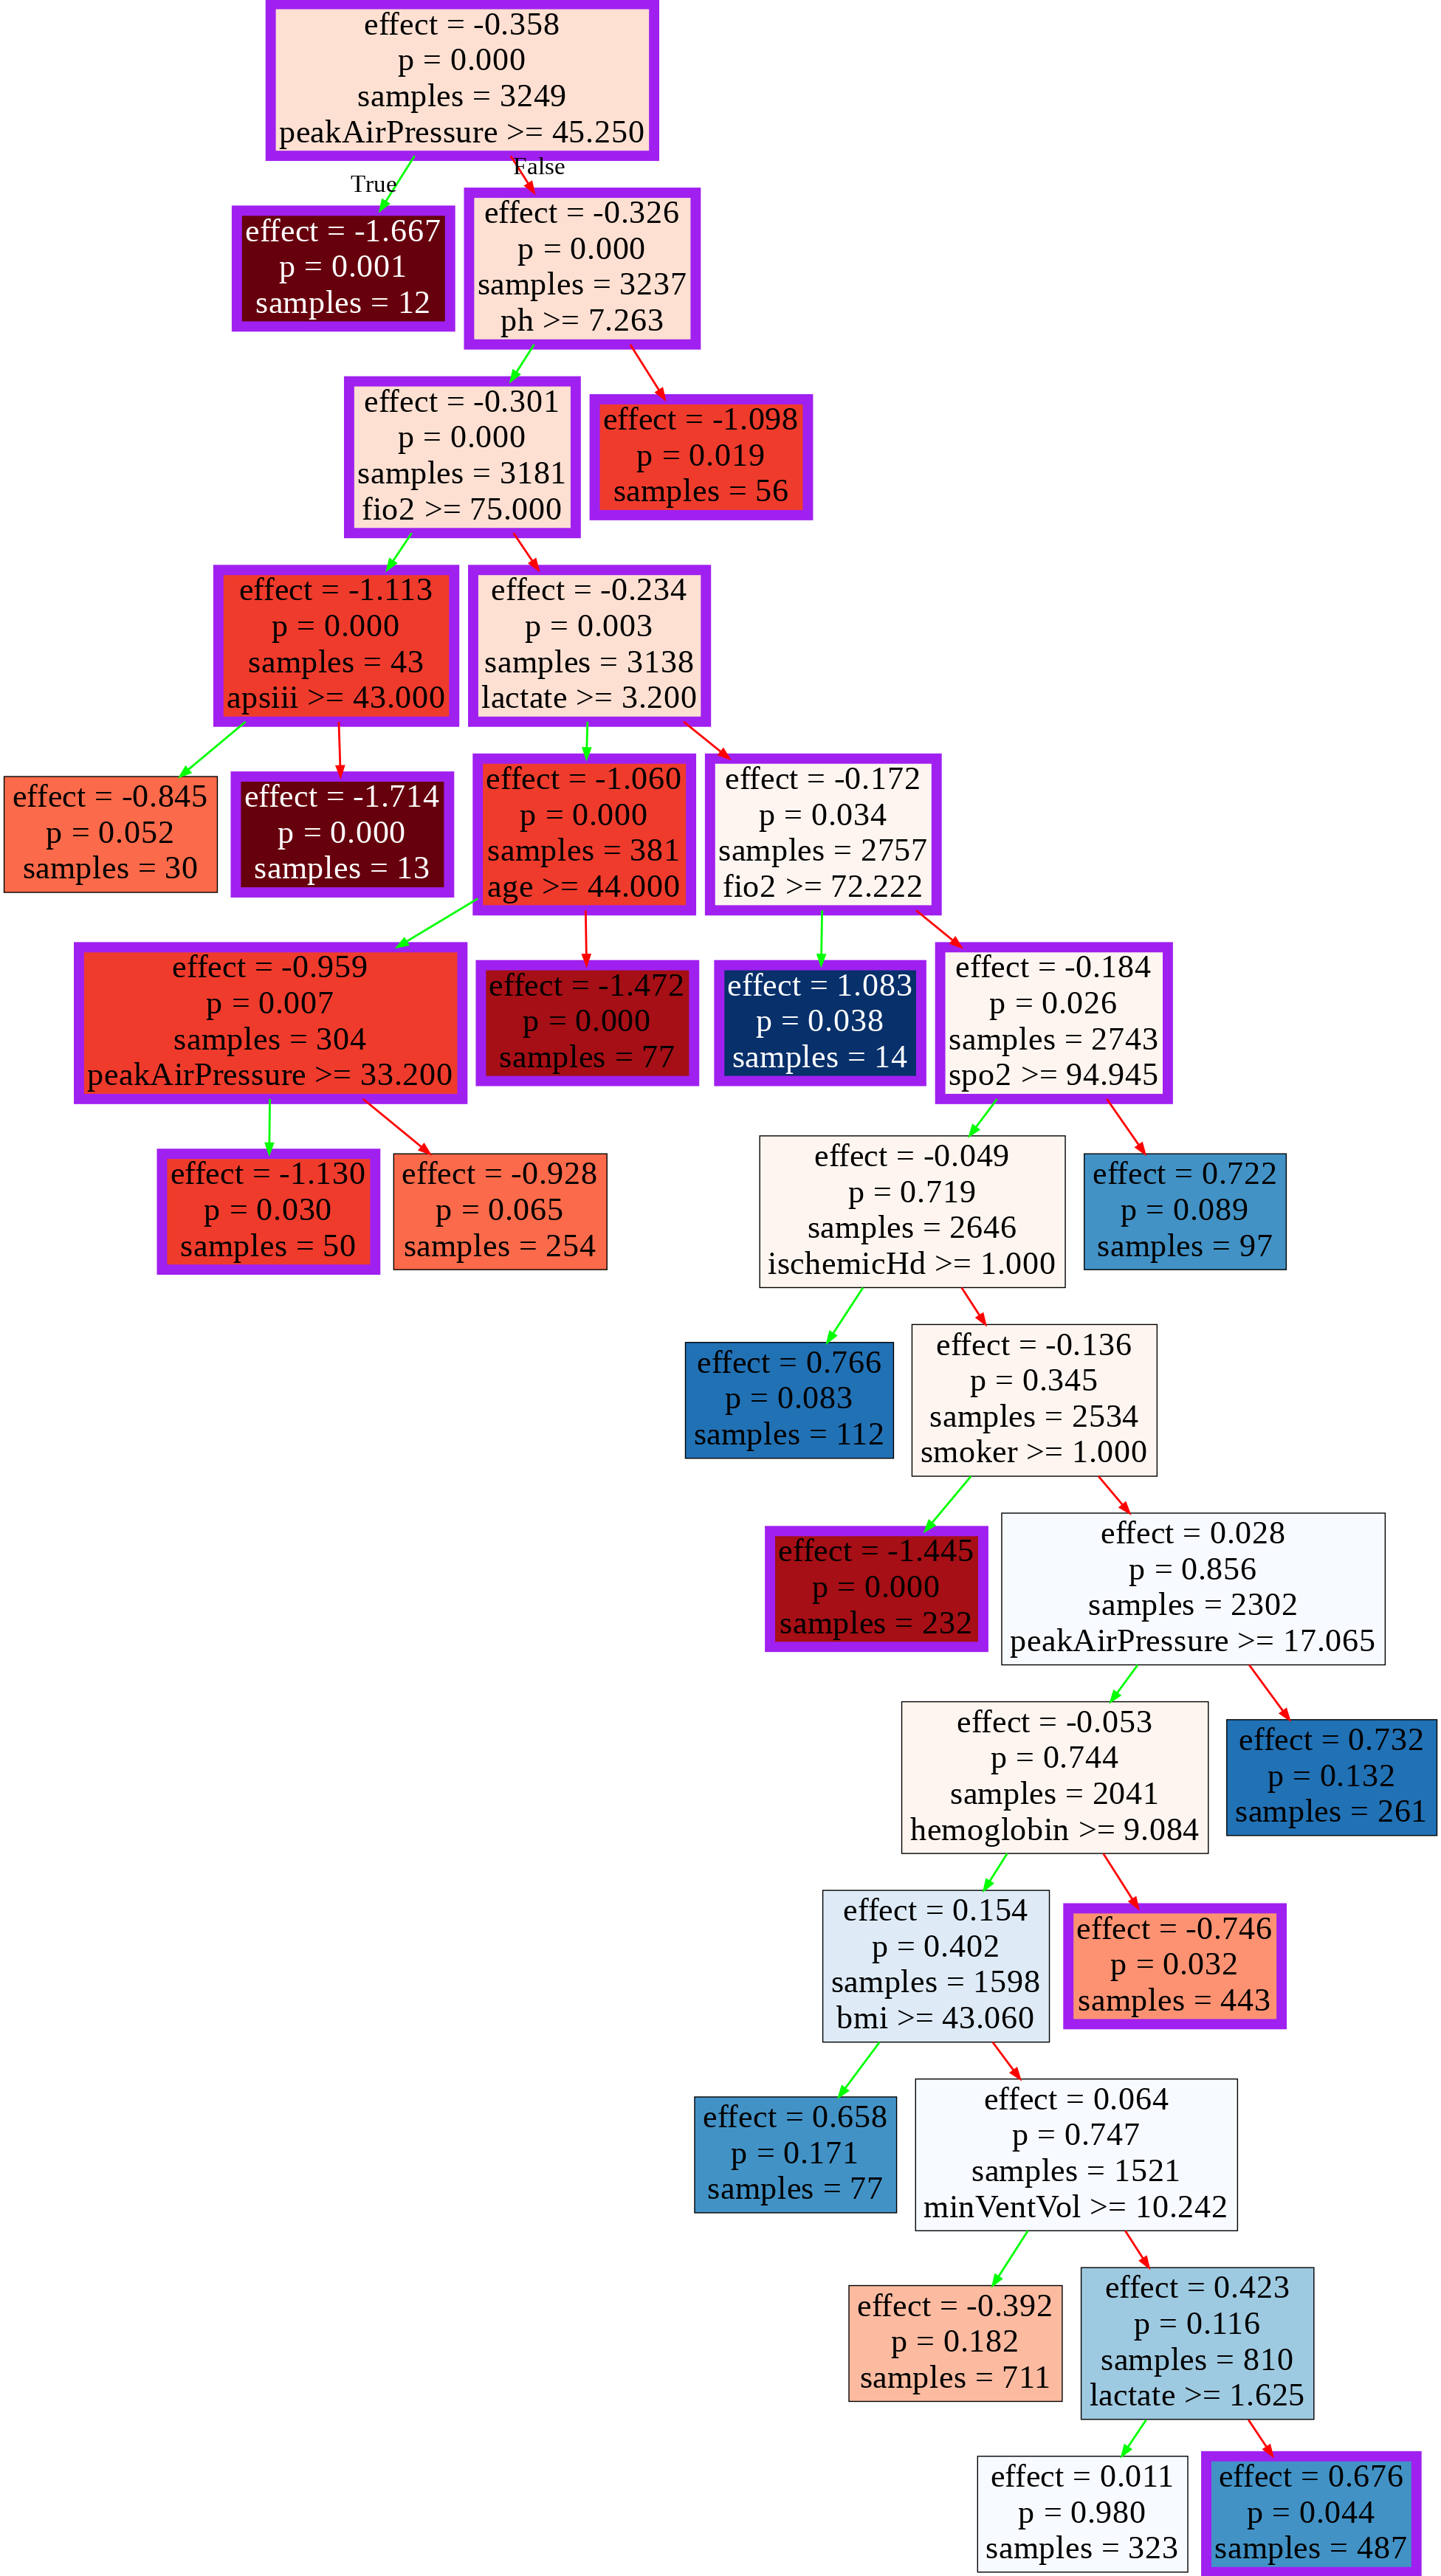

In [35]:
#Display the fitted tree
Image('/content/content/CT-L_20%.png')

In [36]:
# honest CTL (CT-HL)
cthl = CausalTree(honest=True)
cthl.fit(x_train, y_train, treat_train)
cthl.prune()
cthl_predict = cthl.predict(x_test)

In [37]:
#Plotting the fitted tree
cthl.plot_tree(features=columns, filename="content/CT-HL_20%", show_effect=True)

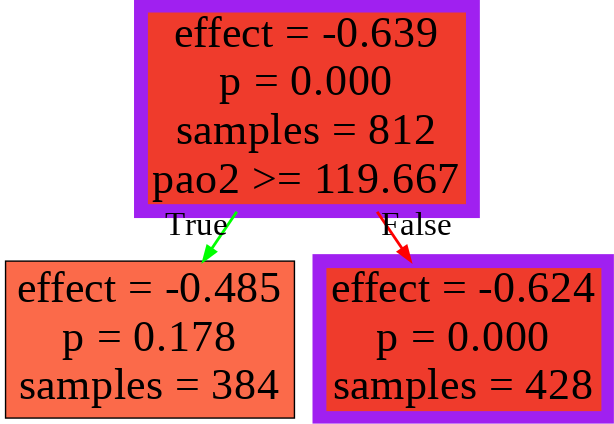

In [38]:
#Display the fitted tree
Image('/content/content/CT-HL_20%.png')

In [39]:
# val honest CTL (CT-HV)
cthv = CausalTree(val_honest=True)
cthv.fit(x_train, y_train, treat_train)
cthv.prune()
cthv_predict = cthv.predict(x_test)

In [40]:
#Plotting the fitted trees
cthv.plot_tree(features=columns, filename="content/CT-HV_20%", show_effect=True)

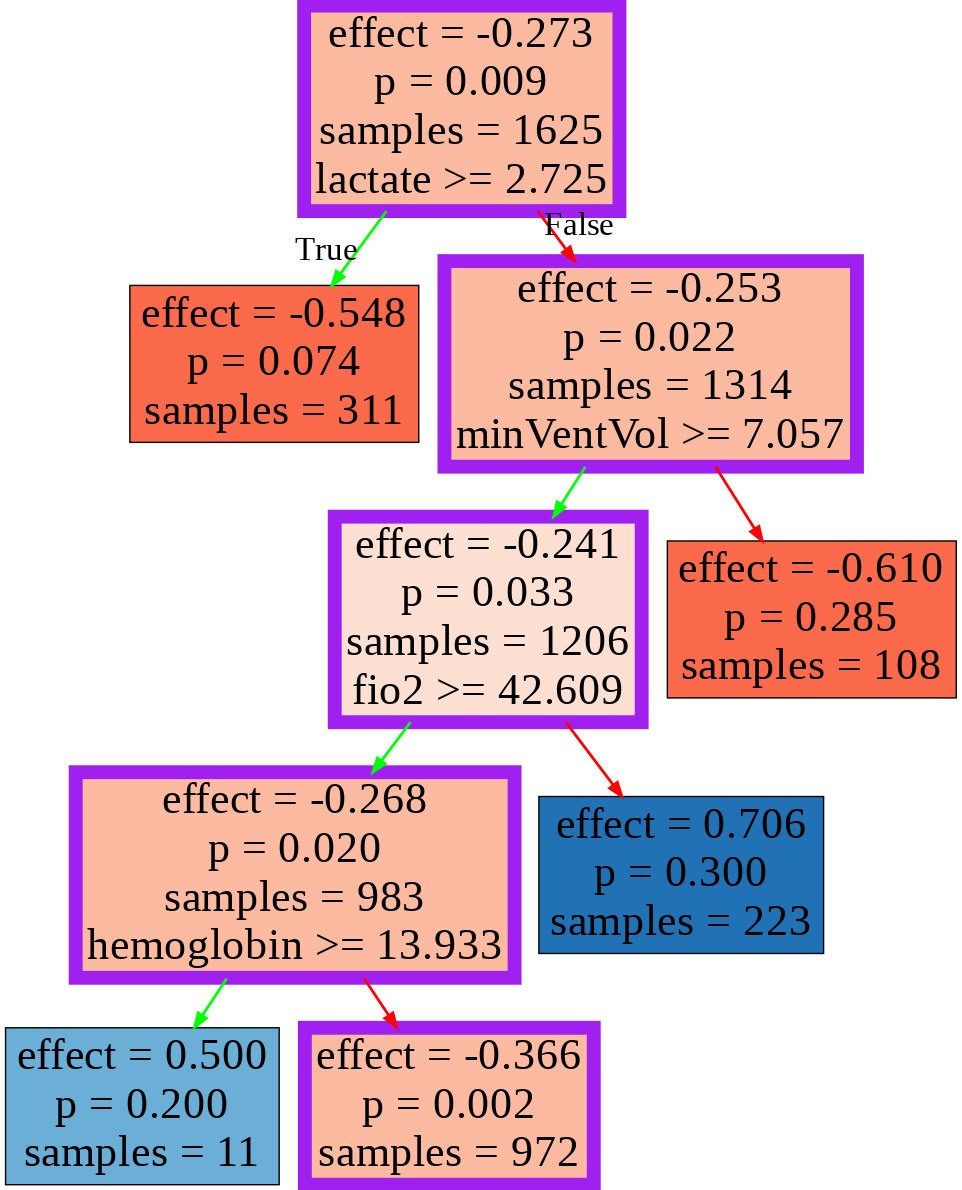

In [41]:
#Display the fitted trees
Image('/content/content/CT-HV_20%.png')

# **Test Size = 30%**

In [42]:
np.random.seed(0)

#train-test split
x_train, x_test, y_train, y_test, treat_train, treat_test = train_test_split(x, y, treatment, test_size=0.3, random_state=42)

In [43]:
# adaptive CT
ct_adaptive = CausalTree(weight=0.0, split_size=0.0)
ct_adaptive.fit(x_train, y_train, treat_train)
ct_adaptive.prune()
ct_adaptive_predict = ct_adaptive.predict(x_test)

In [44]:
#Plotting the fitted tree
ct_adaptive.plot_tree(features=columns, filename="content/CT-A_30%", show_effect=True)

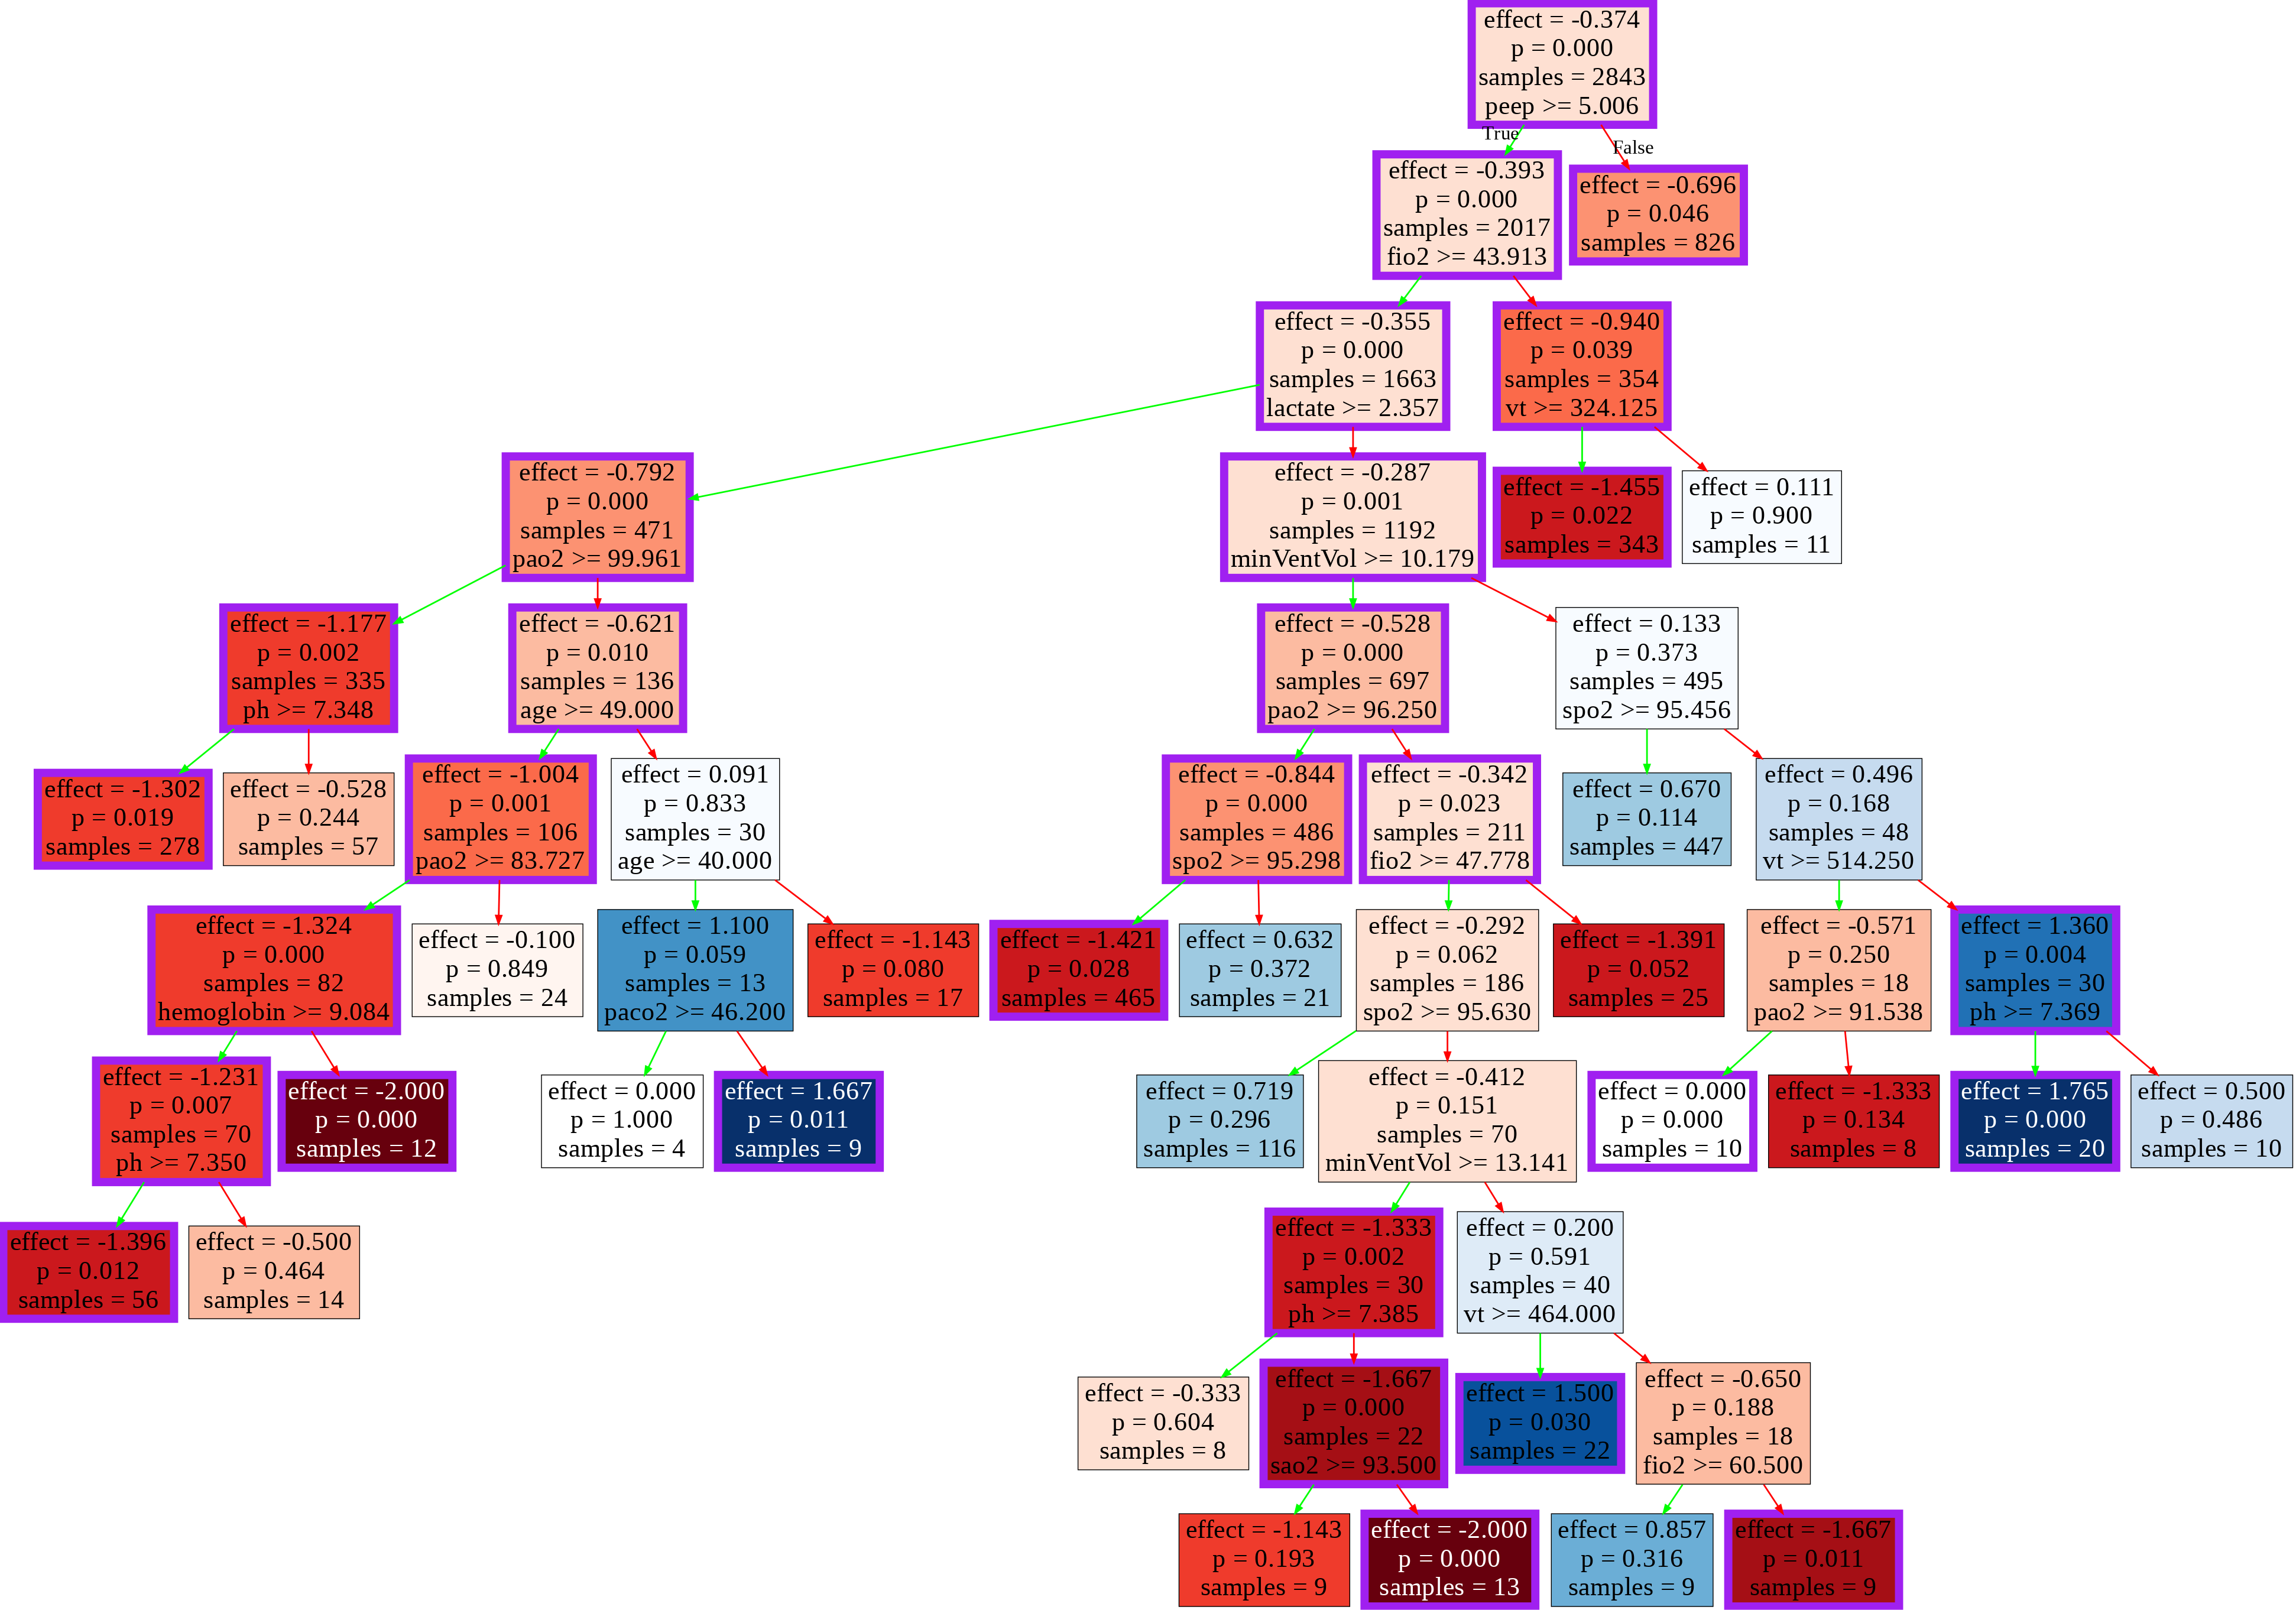

In [45]:
#Display the fitted tree
Image('/content/content/CT-A_30%.png')

In [46]:
# honest CT 
ct_honest = CausalTree(honest=True, weight=0.0, split_size=0.0)
ct_honest.fit(x_train, y_train, treat_train)
ct_honest.prune()
ct_honest_predict = ct_honest.predict(x_test)

In [47]:
#Plotting the fitted tree
ct_honest.plot_tree(features=columns, filename="content/CT-H_30%", show_effect=True)

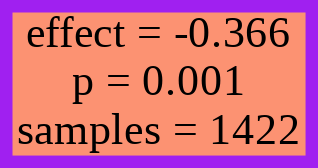

In [48]:
#Display the fitted tree
Image('/content/content/CT-H_30%.png')

In [49]:
# regular CTL
ctl = CausalTree(magnitude=False)
ctl.fit(x_train, y_train, treat_train)
ctl.prune()
ctl_predict = ctl.predict(x_test)

In [50]:
#Plotting the fitted tree
ctl.plot_tree(features=columns, filename="content/CT-L_30%", show_effect=True)

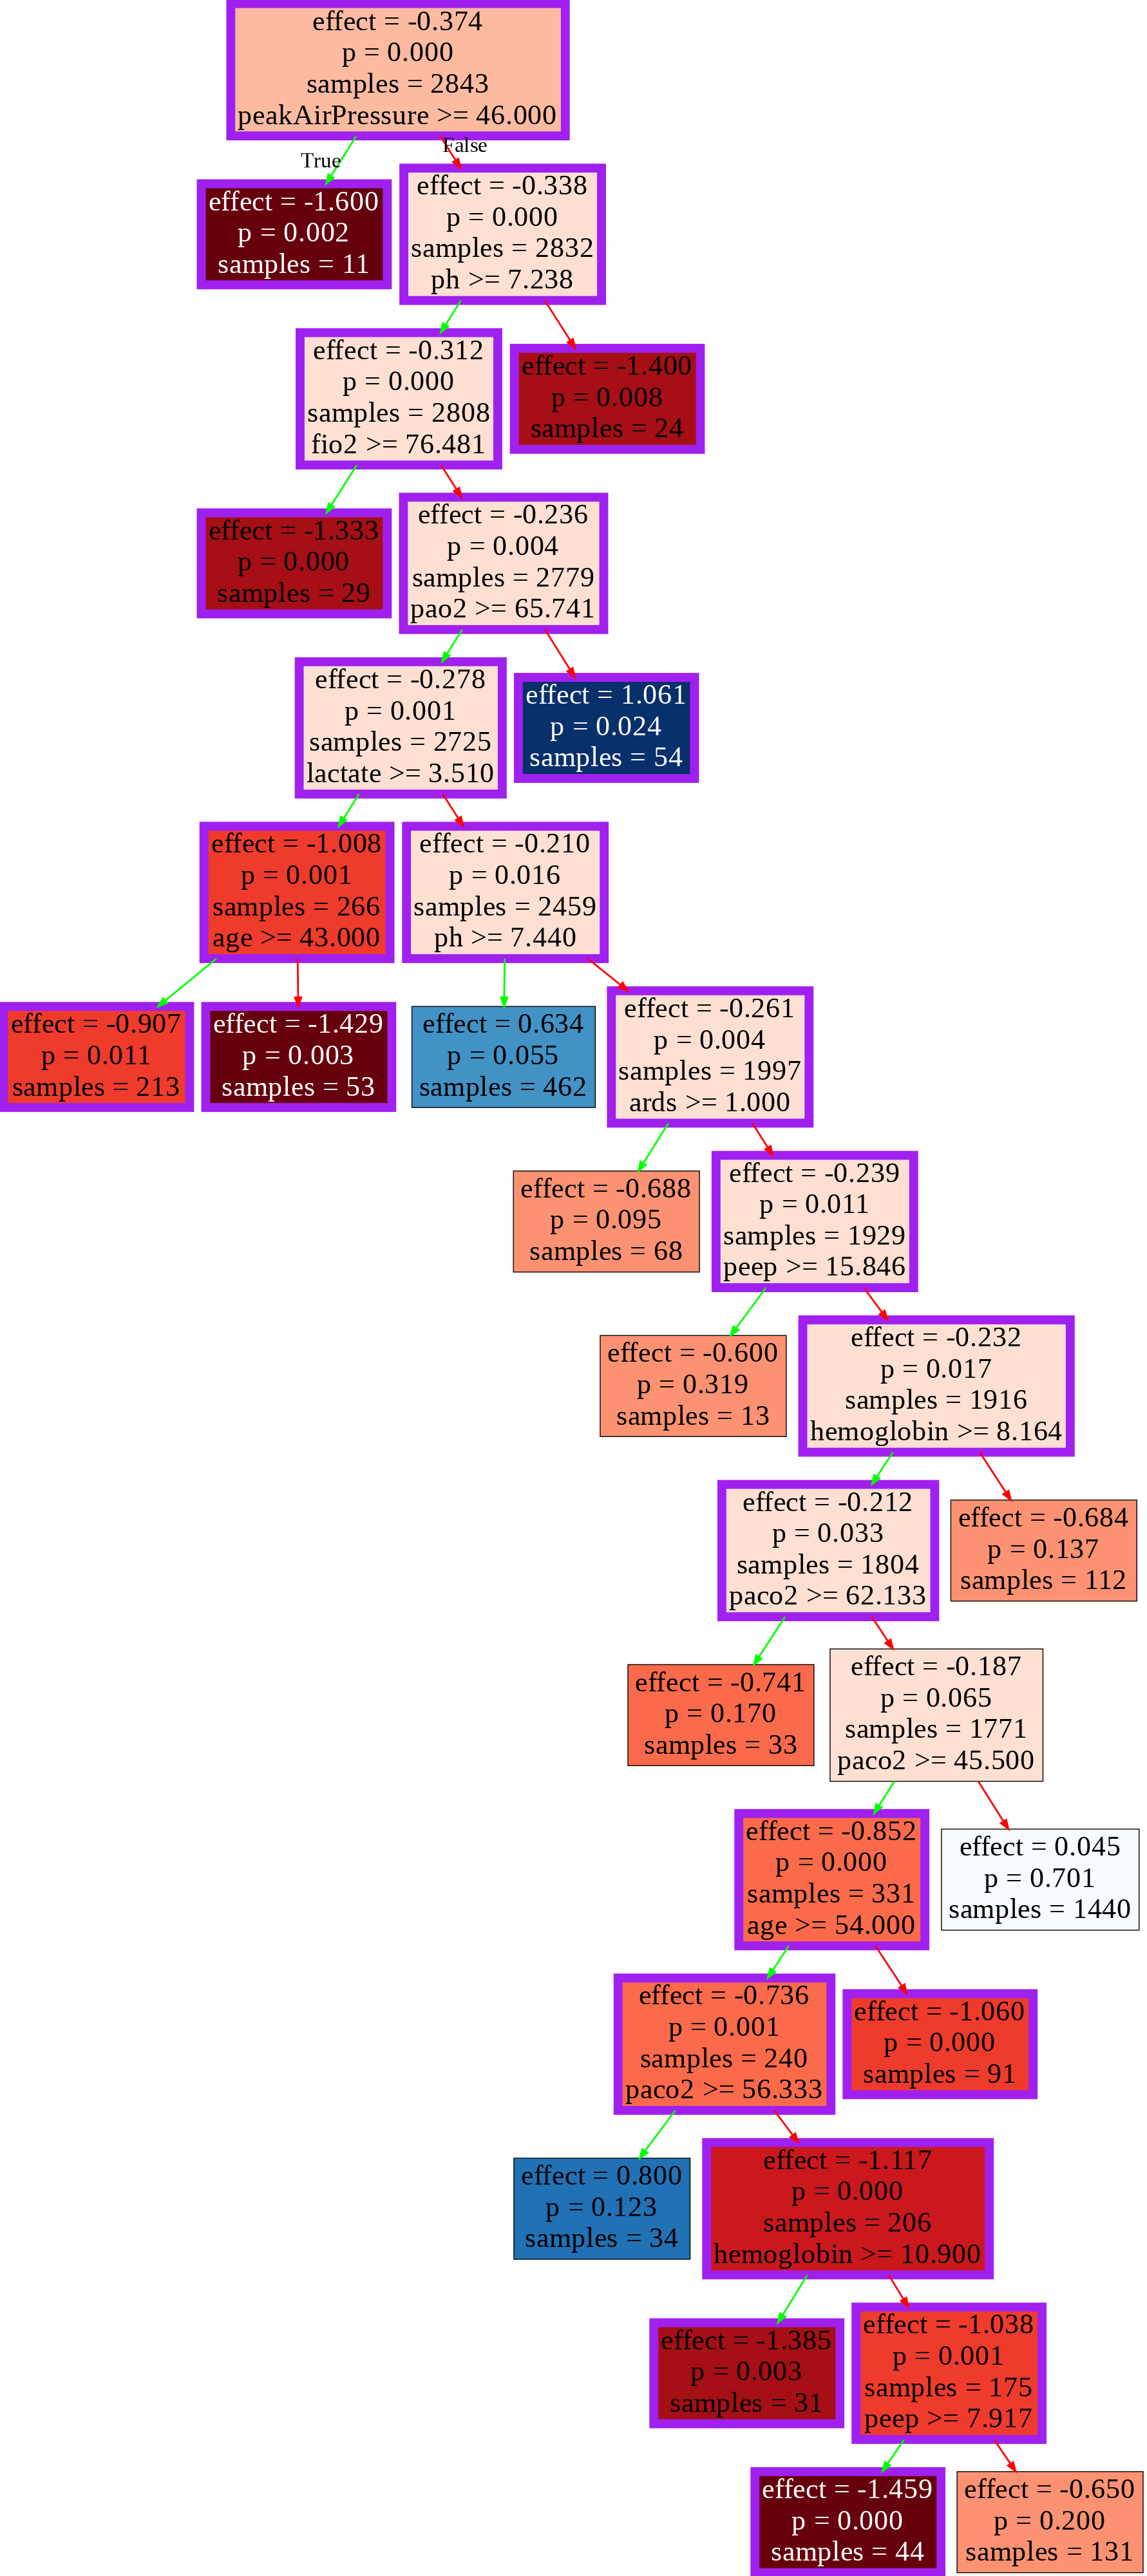

In [51]:
#Display the fitted tree
Image('/content/content/CT-L_30%.png')

In [52]:
# honest CTL (CT-HL)
cthl = CausalTree(honest=True)
cthl.fit(x_train, y_train, treat_train)
cthl.prune()
cthl_predict = cthl.predict(x_test)

In [53]:
#Plotting the fitted tree
cthl.plot_tree(features=columns, filename="content/CT-HL_30%", show_effect=True)

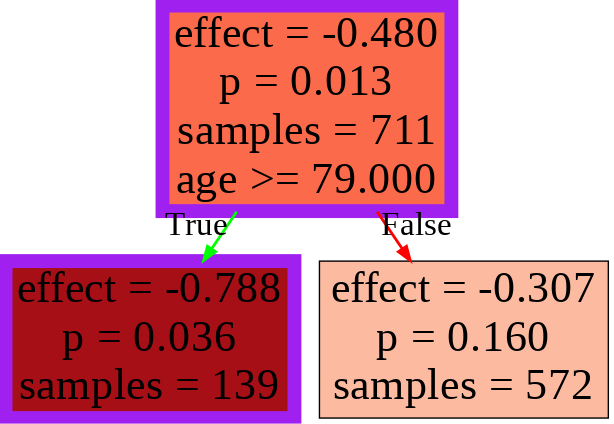

In [54]:
#Display the fitted tree
Image('/content/content/CT-HL_30%.png')

In [55]:
# val honest CTL (CT-HV)
cthv = CausalTree(val_honest=True)
cthv.fit(x_train, y_train, treat_train)
cthv.prune()
cthv_predict = cthv.predict(x_test)

In [56]:
#Plotting the fitted trees
cthv.plot_tree(features=columns, filename="content/CT-HV_30%", show_effect=True)

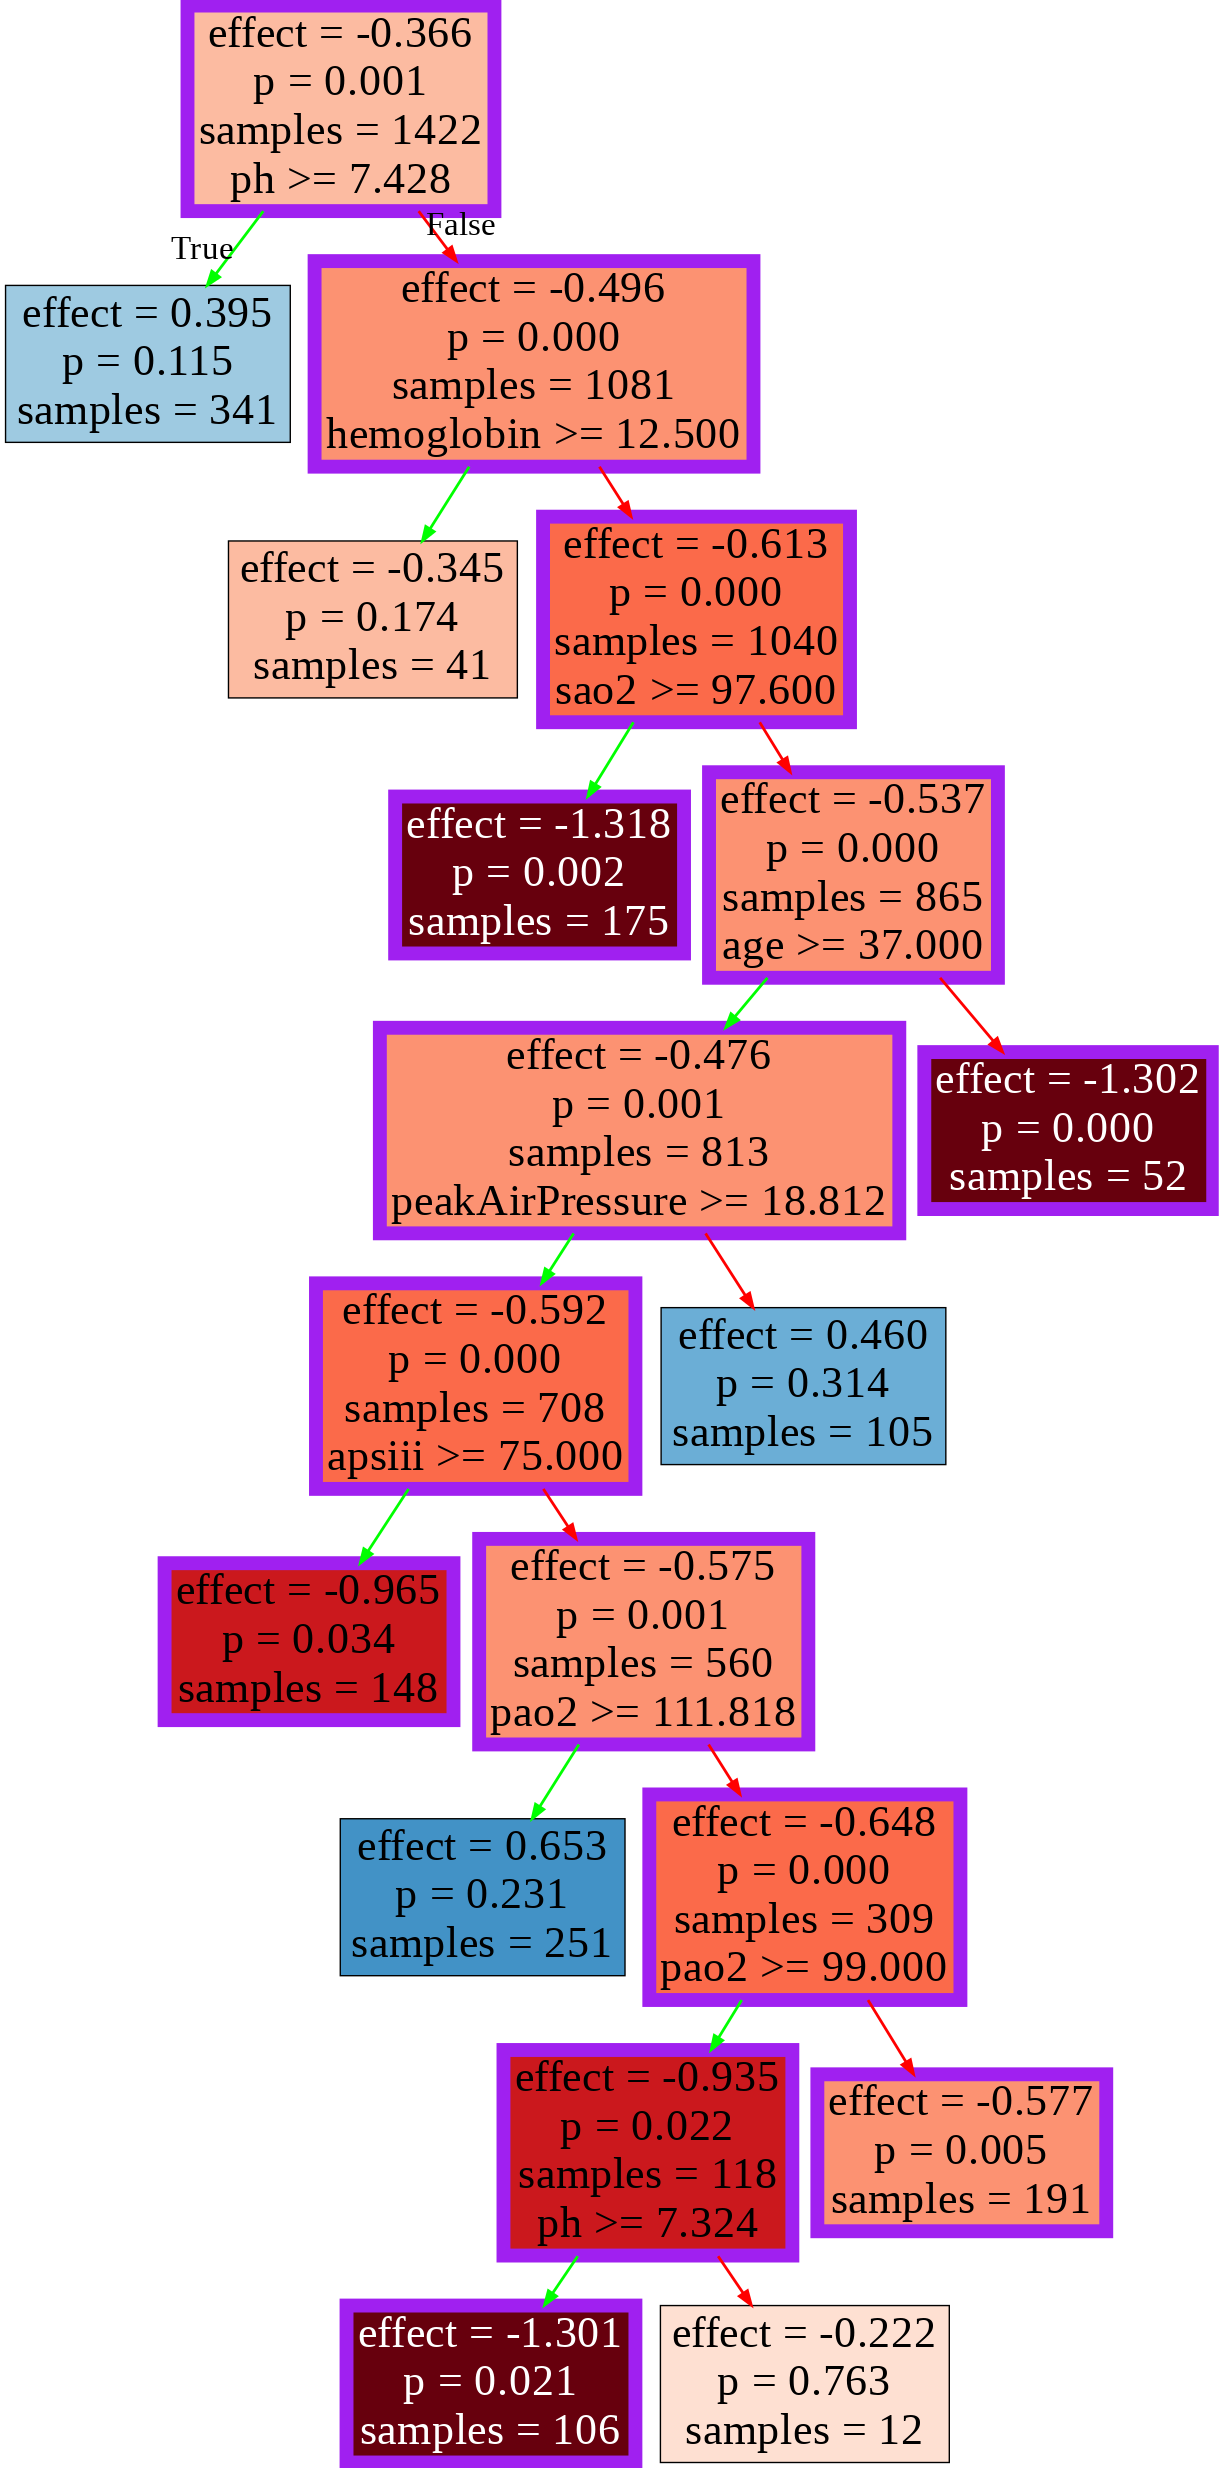

In [57]:
#Display the fitted trees
Image('/content/content/CT-HV_30%.png')

# **Test Size = 40%**

In [59]:
np.random.seed(0)

#train-test split
x_train, x_test, y_train, y_test, treat_train, treat_test = train_test_split(x, y, treatment, test_size=0.4, random_state=42)

# **Test Size = 50%**

In [60]:
np.random.seed(0)

#train-test split
x_train, x_test, y_train, y_test, treat_train, treat_test = train_test_split(x, y, treatment, test_size=0.5, random_state=42)